# Mahindra Analysis

In [0]:
import sys
import os
import pandas as pd
import math
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import OneHotEncoder 
from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import MinMaxScaler
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
!ls

drive  sample_data


In [0]:
os.listdir("drive/My Drive/Mahindra")

['Pune AO- Leads (1).xlsx',
 'Mahindra data - Sheet1.csv',
 'New_data.csv',
 'Mahindra data.gsheet',
 'New_data1.csv']

In [0]:
df_train= pd.read_csv("drive/My Drive/Mahindra/New_data1.csv")
df_train['Customer_ID'] = range(1, 10672)
df_train_selected = df_train.iloc[:,[4,7,9,10,11,13]] #Selecting required columns
df_train_selected.head()



,CITY,MODEL_GROUP,Age,Salary,COLR_CD,Customer_ID
0,NaN,NEW SCORPIO,44,16,White,1
1,BARAMATI,XUV300,24,11,Marine,2
2,BARAMATI,XUV300,27,12,Blue,3
3,NaN,BOLERO P,40,10,White,4
4,INDAPUR,XUV300,32,14,Blue,5


In [0]:
df_train_selected_nona= df_train_selected.dropna()  
df_train_final=df_train_selected_nona

df_train_final.columns = ['City','Model_name','Age','Salary','Colour_preference','Customer_ID']
df_train_finalized = df_train_final 
df_train_finalized.head()

,City,Model_name,Age,Salary,Colour_preference,Customer_ID
1,BARAMATI,XUV300,24,11,Marine,2
2,BARAMATI,XUV300,27,12,Blue,3
4,INDAPUR,XUV300,32,14,Blue,5
7,INDAPUR,MARAZZO,34,10,Blue,8
8,INDAPUR,TUV300,32,11,White,9


In [0]:
label_encoder = preprocessing.LabelEncoder() 
df_train_finalized['Model_name_Coded'] = label_encoder.fit_transform(df_train_finalized['Model_name'])  
df_train_finalized

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,Model_name,Age,Salary,Colour_preference,Customer_ID,Model_name_Coded
1,BARAMATI,XUV300,24,11,Marine,2,4
2,BARAMATI,XUV300,27,12,Blue,3,4
4,INDAPUR,XUV300,32,14,Blue,5,4
7,INDAPUR,MARAZZO,34,10,Blue,8,1
8,INDAPUR,TUV300,32,11,White,9,3
...,...,...,...,...,...,...,...
10665,PUNE,XUV300,25,10,Marine,10666,4
10666,PUNE,MARAZZO,40,13,White,10667,1
10667,PUNE,XUV300,27,13,Black,10668,4
10668,HAVELI,XUV300,20,15,Marine,10669,4


# Class Codes

In [0]:
data_class_codes = df_train_finalized.groupby(['Model_name', 'Model_name_Coded']).size().reset_index(name='Freq')
data_class_codes

,Model_name,Model_name_Coded,Freq
0,BOLERO P,0,1637
1,MARAZZO,1,1539
2,NEW SCORPIO,2,1921
3,TUV300,3,502
4,XUV300,4,3293
5,XUV500,5,728


In [0]:
df_train_nom_cleaned = pd.get_dummies(df_train_finalized.iloc[:,[0,2,3,4]])
df_train_nom_cleaned.head()


,Age,Salary,City_ACHALPUR CITY,City_AHERI,City_AHMADPUR,City_AHMEDANGAR,City_AHMEDNAGAR,City_AHMEDPUER,City_AHMEDPUR,City_AJARA,City_AKKAIKOT,City_AKKALKOT,City_AKOLA,City_AKOLE,City_AKOT,City_AMARAVATI,City_AMBAD,City_AMBAJGOAI,City_AMBAJOGAI,City_AMBEGAON,City_AMBEJOGAI,City_AMGAON,City_AMRAVATI,City_ANJANGAON,City_ARDHAPUR,City_ARJUNI MORGAON,City_ARMORI,City_ARNI,City_ARVI,City_ASHTI,City_ATHANI,City_ATPADI,City_AUNDHA NAGNATH,City_AURANGABAD,City_AUSA,City_BABHULGAON,City_BABULWADE,City_BADNAPUR,City_BALAPUR,City_BALLARPUR,...,City_SHRIGONDA,City_SHRIRAMPUR,City_SHRIRAMPUR.,City_SILLOD,City_SINDEWAHI,City_SINDKHED RAJA,City_SIRONCHA,City_SOLAPUR,City_SONPETH,City_TASGAON,City_THANE,City_TIOSA,City_TIRORA,City_TULJAPUR,City_TUMSAR,City_UDGIR,City_UMARKHED,City_UMERKHED,City_UMRED,City_VAIJAPUR,City_VALVA,City_VASAI,City_VASHI,City_VELHE,City_WAI,City_WANI,City_WARDHA,City_WARORA,City_WARUD,City_WASHI,City_WASHIM,City_YAVATMAL,Colour_preference_Black,Colour_preference_Blue,Colour_preference_Brown,Colour_preference_Grey,Colour_preference_Marine,Colour_preference_Red,Colour_preference_Silver,Colour_preference_White
1,24,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,27,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,32,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,34,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,32,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_train_nom_cleaned,df_train_finalized.iloc[:,6].values , test_size=0.1, random_state=4)

# Training using decision trees

In [0]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset


# Training using Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predictions using logistic regression

In [0]:
y_pred_log = logreg.predict(X_test)
y_pred_df_log = pd.DataFrame(y_pred_log)
y_pred_df_log.columns =['Predicted_model']


y_pred_df_log.loc[y_pred_df_log['Predicted_model'] == 0, 'Model_name_Predicted'] = 'BOLERO P' 
y_pred_df_log.loc[y_pred_df_log['Predicted_model'] == 1, 'Model_name_Predicted'] = 'MARAZZO' 
y_pred_df_log.loc[y_pred_df_log['Predicted_model'] == 2, 'Model_name_Predicted'] = 'NEW SCORPIO' 
y_pred_df_log.loc[y_pred_df_log['Predicted_model'] == 3, 'Model_name_Predicted'] = 'TUV300' 
y_pred_df_log.loc[y_pred_df_log['Predicted_model'] == 4, 'Model_name_Predicted'] = 'XUV300' 
y_pred_df_log.loc[y_pred_df_log['Predicted_model'] == 5, 'Model_name_Predicted'] = 'XUV500' 


# Predictions using Decision trees

In [0]:
y_pred_tree = clf.predict(X_test)
y_pred_df_tree = pd.DataFrame(y_pred_tree)
y_pred_df_tree.columns =['Predicted_model']


y_pred_df_tree.loc[y_pred_df_tree['Predicted_model'] == 0, 'Model_name_Predicted'] = 'BOLERO P' 
y_pred_df_tree.loc[y_pred_df_tree['Predicted_model'] == 1, 'Model_name_Predicted'] = 'MARAZZO' 
y_pred_df_tree.loc[y_pred_df_tree['Predicted_model'] == 2, 'Model_name_Predicted'] = 'NEW SCORPIO' 
y_pred_df_tree.loc[y_pred_df_tree['Predicted_model'] == 3, 'Model_name_Predicted'] = 'TUV300' 
y_pred_df_tree.loc[y_pred_df_tree['Predicted_model'] == 4, 'Model_name_Predicted'] = 'XUV300' 
y_pred_df_tree.loc[y_pred_df_tree['Predicted_model'] == 5, 'Model_name_Predicted'] = 'XUV500' 



In [0]:
y_test_df = pd.DataFrame(y_test)
y_test_df.columns =['Actual_model']

y_test_df.loc[y_test_df['Actual_model'] == 0, 'Model_name_actual'] = 'BOLERO P' 
y_test_df.loc[y_test_df['Actual_model'] == 1, 'Model_name_actual'] = 'MARAZZO' 
y_test_df.loc[y_test_df['Actual_model'] == 2, 'Model_name_actual'] = 'NEW SCORPIO' 
y_test_df.loc[y_test_df['Actual_model'] == 3, 'Model_name_actual'] = 'TUV300' 
y_test_df.loc[y_test_df['Actual_model'] == 4, 'Model_name_actual'] = 'XUV300' 
y_test_df.loc[y_test_df['Actual_model'] == 5, 'Model_name_actual'] = 'XUV500' 



In [0]:
from sklearn.metrics import confusion_matrix

y_true = y_test_df['Model_name_actual']
y_pred = y_pred_df_tree['Model_name_Predicted']   # REPLACE  y_pred_df_log WITH y_pred_df_tree TO GET CONFUISION MATRIX FOR DECISION TREES

classes=['BOLERO P','MARAZZO','NEW SCORPIO','TUV300','XUV300','XUV500']

confusion_matrix(y_true, y_pred, labels=['BOLERO P','MARAZZO','NEW SCORPIO','TUV300','XUV300','XUV500'])


array([[167,   0,   0,   1,   0,   0],
       [  0,  68,   5,   8,  71,   0],
       [  0,  12, 167,   0,   0,  13],
       [  0,  14,   1,  21,   3,   0],
       [  0,  71,   0,   6, 255,   0],
       [  0,   1,  23,   0,   0,  55]])

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[167   0   0   1   0   0]
 [  0  68   5   8  71   0]
 [  0  12 167   0   0  13]
 [  0  14   1  21   3   0]
 [  0  71   0   6 255   0]
 [  0   1  23   0   0  55]]


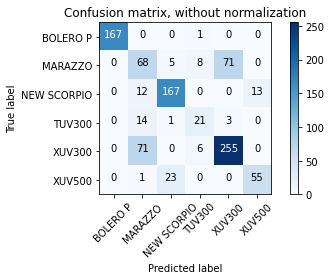

In [0]:
cnf_matrix = confusion_matrix(y_true, y_pred,labels=['BOLERO P','MARAZZO','NEW SCORPIO','TUV300','XUV300','XUV500'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['BOLERO P','MARAZZO','NEW SCORPIO','TUV300','XUV300','XUV500'],
                      title='Confusion matrix, without normalization')

# Enter New Data

![alt text](https://https://miro.medium.com/max/512/1*-BkpqhN-5fPicMifDQ0SwA.png)

In [0]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


@interact
def show_articles_more_than(City=set(df_train_finalized.City),Age=set(df_train_finalized.Age),   Salary=set(df_train_finalized.Salary),    Colour_preference=set(df_train_finalized.Colour_preference)  ):
    new_details =   pd.DataFrame(columns=df_train_nom_cleaned.columns   ) 
    new_details.loc[len(new_details)] = 0
    new_details['City_'+City][0]=1
    new_details['Age'][0]=Age
    new_details['Salary'][0]=Salary
    new_details['Colour_preference_'+Colour_preference][0]=1
    y_pred_new = logreg.predict(new_details)      #IN THIS LINE IF U REPLACE WITH  ***y_pred_new = clf.predict(new_details)*** THEN DECISION TREES WILL BE USED TO MAKE THE PREDICTION
    y_pred_New_df = pd.DataFrame(y_pred_new)
    y_pred_New_df.columns =['Predicted_model']


    y_pred_New_df.loc[y_pred_New_df['Predicted_model'] == 0, 'Model_name_Predicted'] = 'BOLERO P' 
    y_pred_New_df.loc[y_pred_New_df['Predicted_model'] == 1, 'Model_name_Predicted'] = 'MARAZZO' 
    y_pred_New_df.loc[y_pred_New_df['Predicted_model'] == 2, 'Model_name_Predicted'] = 'NEW SCORPIO' 
    y_pred_New_df.loc[y_pred_New_df['Predicted_model'] == 3, 'Model_name_Predicted'] = 'TUV300' 
    y_pred_New_df.loc[y_pred_New_df['Predicted_model'] == 4, 'Model_name_Predicted'] = 'XUV300' 
    y_pred_New_df.loc[y_pred_New_df['Predicted_model'] == 5, 'Model_name_Predicted'] = 'XUV500' 
    
    return y_pred_New_df

interactive(children=(Dropdown(description='City', options=('MUMBAI', 'NAGPUR', 'BHOKARDAN', 'PAITHAN', 'RAHTA…

In [0]:
new_details

NameError: ignored